<a href="https://colab.research.google.com/github/Lieyanto01/Machine-Learning/blob/main/ML_Model4_KulinerIn_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Unzip Dataset

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = "https://drive.google.com/file/d/1EUvljXrsWFMIBLWZWbBCYCK5LBBXNHST/view?usp=sharing"

In [5]:
id = link.split('d/')[1].split('/view?')[0]
print (id)

1EUvljXrsWFMIBLWZWbBCYCK5LBBXNHST


In [6]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('KulinerIn_Dataset.zip')

In [7]:
zip_file = 'KulinerIn_Dataset.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall()
zip_ref.close()

In [8]:
# zip_file = '/content/gdrive/My Drive/KulinerIn_Dataset.zip'
# zip_ref = zipfile.ZipFile(zip_file, 'r')
# zip_ref.extractall()

# zip_ref.close()

# **Dataset Directory**

In [9]:
folder_dir = 'KulinerIn_Dataset'
print("Contents of base directory:")
print(os.listdir(folder_dir))

print("\nContents of train directory:")
print(os.listdir(f'{folder_dir}/Train'))

print("\nContents of test directory:")
print(os.listdir(f'{folder_dir}/Test'))

Contents of base directory:
['Test', 'Train']

Contents of train directory:
['Serabi', 'Lapis_legit', 'Kue_lapis_sagu', 'Martabak_Manis', 'Onde-Onde', 'Klepon', 'Martabak_asin', 'Nastar', 'kue_putri_salju', 'Pukis']

Contents of test directory:
['Serabi', 'Lapis_legit', 'Kue_lapis_sagu', 'Martabak_Manis', 'Onde-Onde', 'Klepon', 'Martabak_asin', 'Nastar', 'kue_putri_salju', 'Pukis']


In [10]:
train_dir = os.path.join(folder_dir, 'Train')
test_dir = os.path.join(folder_dir, 'Test')

#Directory of food training images
train_klepon_dir = os.path.join(train_dir, 'Klepon')
train_lapis_sagu_dir = os.path.join(train_dir, 'Kue_lapis_sagu')
train_putri_salju_dir = os.path.join(train_dir, 'kue_putri_salju')
train_lapis_legit_dir = os.path.join(train_dir, 'Lapis_legit')
train_martabak_asin_dir = os.path.join(train_dir, 'Martabak_asin')
train_martabak_manis_dir = os.path.join(train_dir, 'Martabak_Manis')
train_nastar_dir = os.path.join(train_dir, 'Nastar')
train_onde_onde_dir = os.path.join(train_dir, 'Onde-Onde')
train_pukis_dir = os.path.join(train_dir, 'Pukis')
train_serabi_dir = os.path.join(train_dir, 'Serabi')

In [11]:
#Directory of food testing images
test_klepon_dir = os.path.join(test_dir, 'Klepon')
test_lapis_sagu_dir = os.path.join(test_dir, 'Kue_lapis_sagu')
test_putri_salju_dir = os.path.join(test_dir, 'kue_putri_salju')
test_lapis_legit_dir = os.path.join(test_dir, 'Lapis_legit')
test_martabak_asin_dir = os.path.join(test_dir, 'Martabak_asin')
test_martabak_manis_dir = os.path.join(test_dir, 'Martabak_Manis')
test_nastar_dir = os.path.join(test_dir, 'Nastar')
test_onde_onde_dir = os.path.join(test_dir, 'Onde-Onde')
test_pukis_dir = os.path.join(test_dir, 'Pukis')
test_serabi_dir = os.path.join(test_dir, 'Serabi')

In [12]:
train_klepon_filenames = os.listdir(train_klepon_dir)
train_lapis_sagu_filenames = os.listdir(train_lapis_sagu_dir)
train_putri_salju_filenames = os.listdir(train_putri_salju_dir)
train_lapis_legit_filenames = os.listdir(train_lapis_legit_dir)
train_martabak_asin_filenames = os.listdir(train_martabak_asin_dir)
train_martabak_manis_filenames = os.listdir(train_martabak_manis_dir)
train_nastar_filenames = os.listdir(train_nastar_dir)
train_onde_onde_filenames = os.listdir(train_onde_onde_dir)
train_pukis_filenames = os.listdir(train_pukis_dir)
train_serabi_filenames = os.listdir(train_serabi_dir)

In [13]:
test_klepon_filenames = os.listdir(test_klepon_dir)
test_lapis_sagu_filenames = os.listdir(test_lapis_sagu_dir)
test_putri_salju_filenames = os.listdir(test_putri_salju_dir)
test_lapis_legit_filenames = os.listdir(test_lapis_legit_dir)
test_martabak_asin_filenames = os.listdir(test_martabak_asin_dir)
test_martabak_manis_filenames = os.listdir(test_martabak_manis_dir)
test_nastar_filenames = os.listdir(test_nastar_dir)
test_onde_onde_filenames = os.listdir(test_onde_onde_dir)
test_pukis_filenames = os.listdir(test_pukis_dir)
test_serabi_filenames = os.listdir(test_serabi_dir)

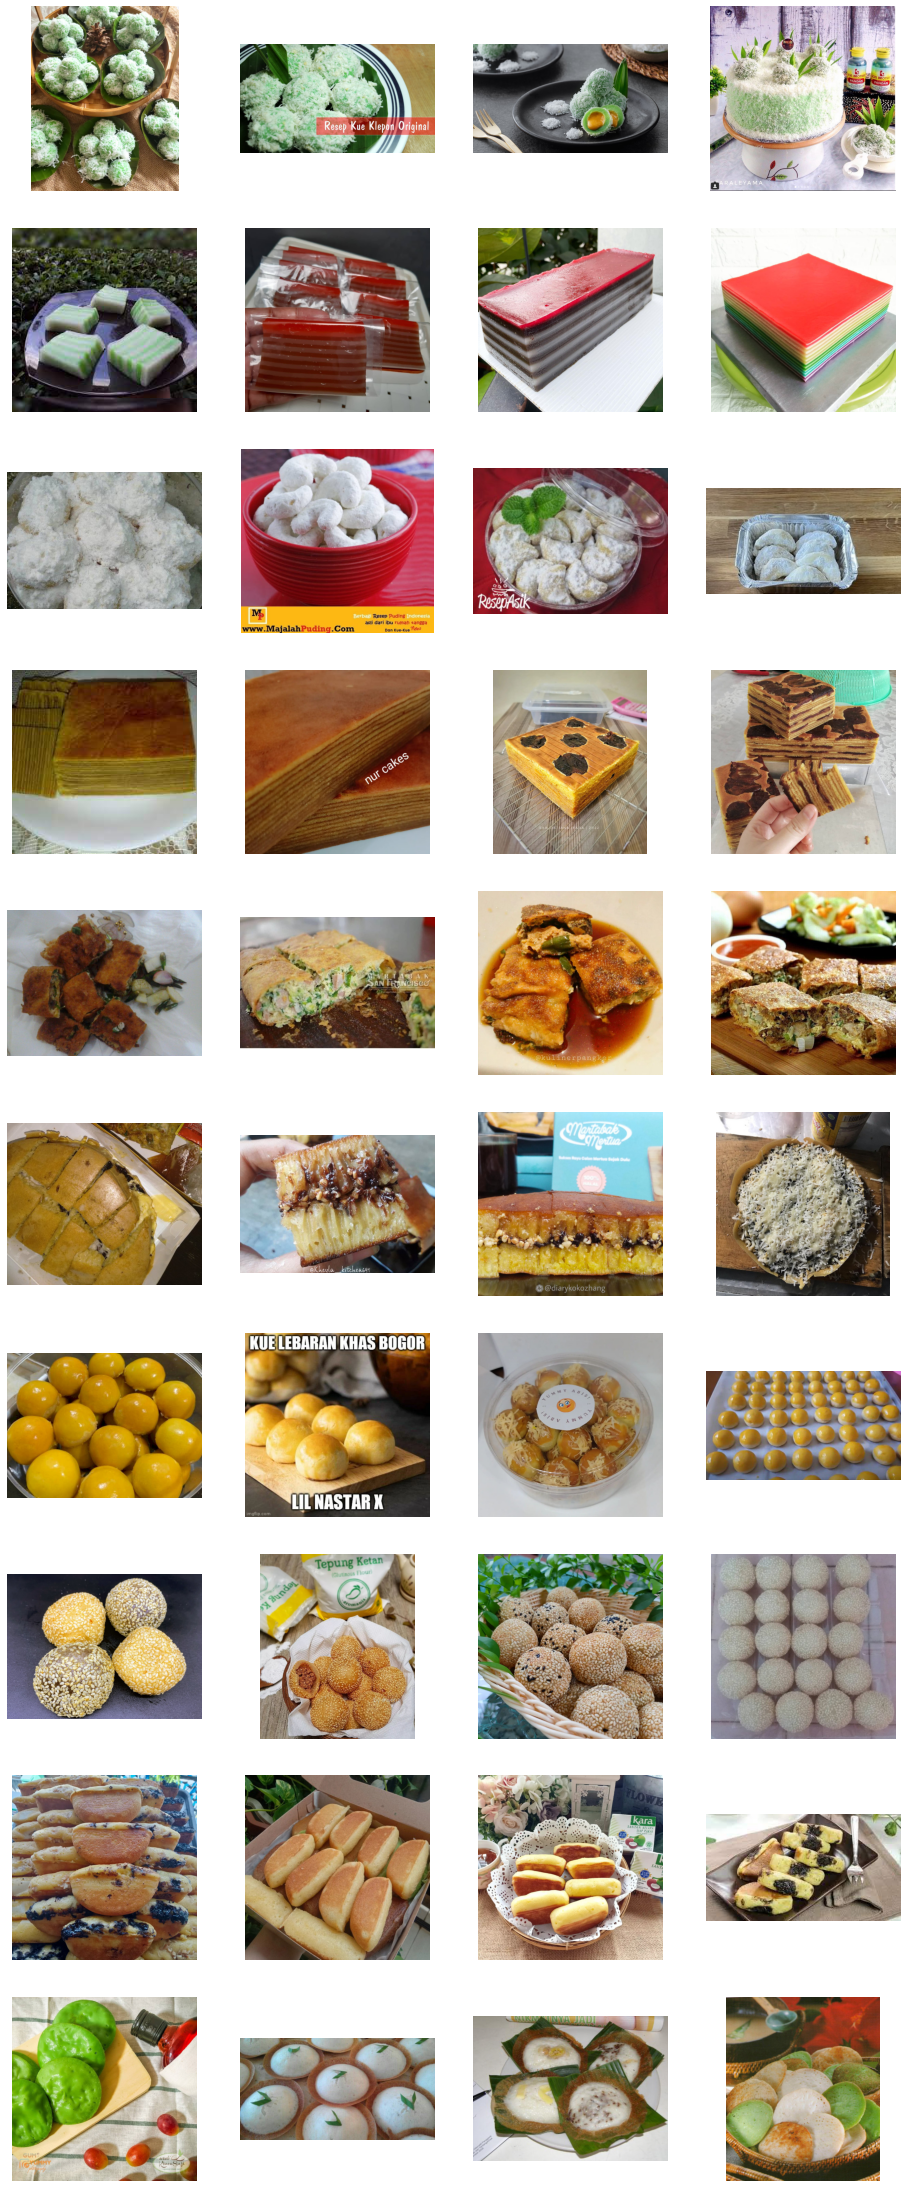

In [14]:
%matplotlib inline

nrows = 10
ncols = 4

pic_index = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_klepon = [os.path.join(train_klepon_dir, filename)
                   for filename in train_klepon_filenames[pic_index-4:pic_index]
                  ]
next_lapis_sagu = [os.path.join(train_lapis_sagu_dir, filename)
                   for filename in train_lapis_sagu_filenames[pic_index-4:pic_index]
                  ]
next_putri_salju = [os.path.join(train_putri_salju_dir, filename)
                   for filename in train_putri_salju_filenames[pic_index-4:pic_index]
                  ]
next_lapis_legit = [os.path.join(train_lapis_legit_dir, filename)
                   for filename in train_lapis_legit_filenames[pic_index-4:pic_index]
                  ]
next_martabak_asin = [os.path.join(train_martabak_asin_dir, filename)
                   for filename in train_martabak_asin_filenames[pic_index-4:pic_index]
                  ]
next_martabak_manis = [os.path.join(train_martabak_manis_dir, filename)
                   for filename in train_martabak_manis_filenames[pic_index-4:pic_index]
                  ]
next_nastar = [os.path.join(train_nastar_dir, filename)
                   for filename in train_nastar_filenames[pic_index-4:pic_index]
                  ]
next_onde_onde = [os.path.join(train_onde_onde_dir, filename)
                   for filename in train_onde_onde_filenames[pic_index-4:pic_index]
                  ]
next_pukis = [os.path.join(train_pukis_dir, filename)
                   for filename in train_pukis_filenames[pic_index-4:pic_index]
                  ]
next_serabi = [os.path.join(train_serabi_dir, filename)
                   for filename in train_serabi_filenames[pic_index-4:pic_index]
                  ]
for i, img_path in enumerate(next_klepon + next_lapis_sagu + next_putri_salju + 
                             next_lapis_legit + next_martabak_asin + next_martabak_manis +
                             next_nastar + next_onde_onde + next_pukis + next_serabi ):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Image Augmentation**

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(224, 224),
                  class_mode='categorical',
                  batch_size= 20)

test_datagen = ImageDataGenerator(rescale=1./255)
                                    
test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size=(224, 224),
                 class_mode='categorical',
                 batch_size= 20)

Found 2865 images belonging to 10 classes.
Found 398 images belonging to 10 classes.


# **Train Model with CNN**

In [16]:
def create_model():
  model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224,3)),
          tf.keras.layers.MaxPool2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224,3)),
          tf.keras.layers.MaxPool2D(2,2),
          tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
          tf.keras.layers.MaxPool2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
          ])
  learning_rate = 0.0001
  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
  return model

In [17]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [18]:
history = model.fit (train_generator,
                     steps_per_epoch= 2865/20,
                     epochs= 50,
                     validation_data= test_generator,
                     validation_steps = 398/20,
                     verbose = 2)

Epoch 1/50
143/143 - 99s - loss: 1.9819 - accuracy: 0.2649 - val_loss: 1.8993 - val_accuracy: 0.2462 - 99s/epoch - 692ms/step
Epoch 2/50
143/143 - 84s - loss: 1.7252 - accuracy: 0.3672 - val_loss: 1.7447 - val_accuracy: 0.3317 - 84s/epoch - 586ms/step
Epoch 3/50
143/143 - 85s - loss: 1.6042 - accuracy: 0.4307 - val_loss: 1.6291 - val_accuracy: 0.3970 - 85s/epoch - 591ms/step
Epoch 4/50
143/143 - 84s - loss: 1.5254 - accuracy: 0.4597 - val_loss: 1.5695 - val_accuracy: 0.4070 - 84s/epoch - 588ms/step
Epoch 5/50
143/143 - 85s - loss: 1.4397 - accuracy: 0.5030 - val_loss: 1.4415 - val_accuracy: 0.4598 - 85s/epoch - 594ms/step
Epoch 6/50
143/143 - 84s - loss: 1.3807 - accuracy: 0.5246 - val_loss: 1.4953 - val_accuracy: 0.4749 - 84s/epoch - 587ms/step
Epoch 7/50
143/143 - 85s - loss: 1.3376 - accuracy: 0.5326 - val_loss: 1.4045 - val_accuracy: 0.4774 - 85s/epoch - 593ms/step
Epoch 8/50
143/143 - 85s - loss: 1.2920 - accuracy: 0.5449 - val_loss: 1.3361 - val_accuracy: 0.4975 - 85s/epoch - 590

In [19]:
loss = model.evaluate(test_generator, steps=10)

10/10 [==============================] - 3s 256ms/step - loss: 1.0392 - accuracy: 0.6600


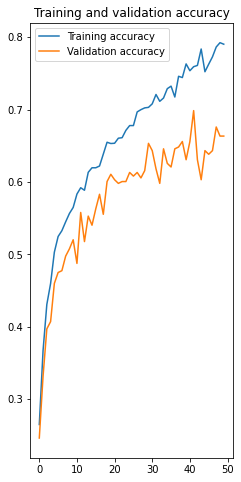

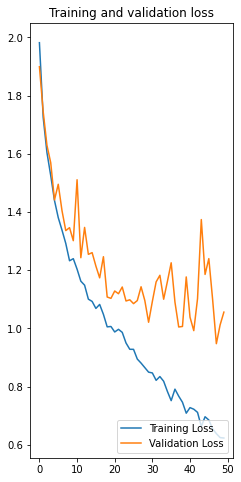

In [20]:
def plot_loss_acc(history):
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation accuracy')
  plt.legend(loc='upper left')
  plt.title('Training and validation accuracy')

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.legend(loc='lower right')
  plt.title('Training and validation loss')
 
  plt.show()
# Plot training results
plot_loss_acc(history)

In [22]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path= fn
  img=image.load_img(path, target_size=(224, 224))
  
  x=image.img_to_array(img)
  x = x/255.0
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=20)
  print(fn)
  print(classes[0])

Saving lapissagu1.jpg to lapissagu1 (1).jpg
lapissagu1.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
